In [1]:
import sys
sys.path.insert(0, '../Results')
sys.path.insert(0, '../../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
from utils.visualization_utils import perc, SetPlotRC, ApplyFont

In [2]:
if not os.path.exists("Figures"):
    os.mkdir("Figures")

# Low Dimensional Synthetic Experiment 

In [3]:
df_results = pd.read_pickle(r"../Results/SyntheticData_ATT_Estimation_Comparison.pkl")
df_results["a_prime"] = df_results["a_prime"].apply(lambda x: float(x))
df_results.loc[df_results['sigma_square'].isnull(), 'sigma_square'] = -1.
df_results.loc[df_results['alternative_proxy_eta_parameter'].isnull(), 'alternative_proxy_eta_parameter'] = -1.

def popstd(x):
    return np.concatenate(x.values, axis = 1).std(1)

df_results_aggregated = df_results.groupby(['Algorithm', 'Data_Size', 'a_prime', 'sigma_square']).agg({ 'ATT_Estimation':['mean', popstd]}).set_axis(['ATT_mean', 'ATT_std'], axis=1).reset_index()

print(df_results["Algorithm"].unique())
print(df_results.shape)
df_results_aggregated.head()

['Kernel_Altenative_Proxy' 'Kernel_Negative_Control' 'Kernel_ATT']
(2700, 8)


Algorithm  Data_Size  a_prime  sigma_square  \
0  Kernel_ATT        500    -1.00          -1.0   
1  Kernel_ATT        500    -0.50          -1.0   
2  Kernel_ATT        500     0.25          -1.0   
3  Kernel_ATT        500     0.50          -1.0   
4  Kernel_ATT        500     1.50          -1.0   

                                            ATT_mean  \
0  [[1.219728188459721], [1.3318783054773733], [1...   
1  [[1.3252244297888283], [1.4312727791774646], [...   
2  [[1.4991806947982598], [1.5910165124965583], [...   
3  [[1.5639892501167951], [1.6491733489134452], [...   
4  [[1.839453116393876], [1.893522209507322], [1....   

                                             ATT_std  
0  [0.15160088586960427, 0.14912210214119365, 0.1...  
1  [0.1433077380159727, 0.14010769079051089, 0.13...  
2  [0.14952111232345924, 0.1445077447005199, 0.13...  
3  [0.15792141333246879, 0.15280241852521728, 0.1...  
4  [0.23265772054671038, 0.22885226409496584, 0.2...

## Estimation Plots

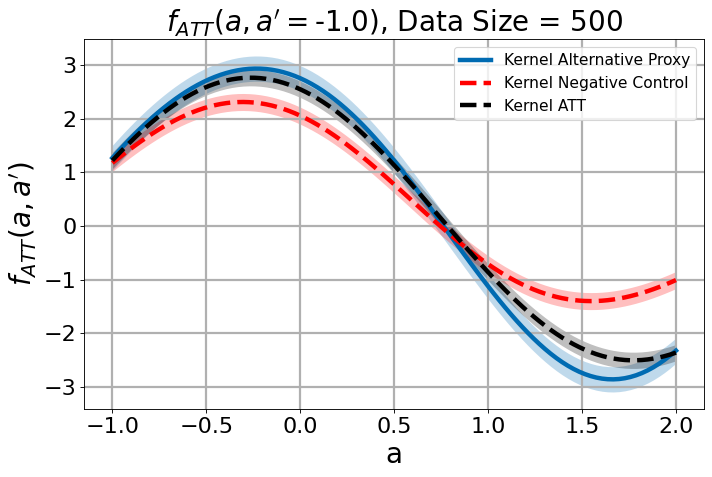

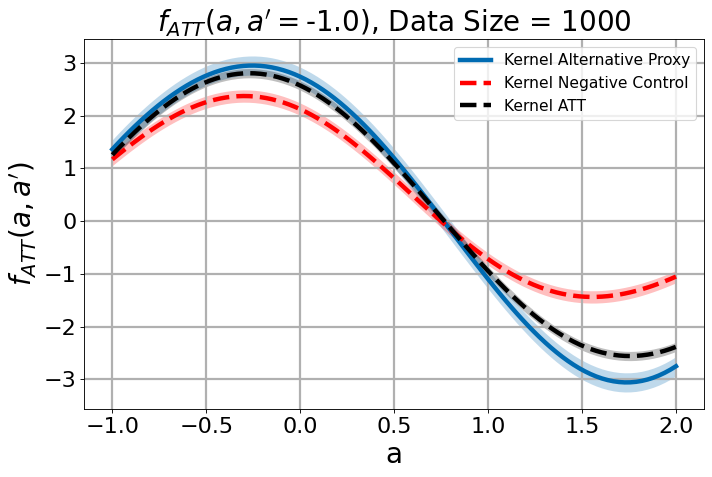

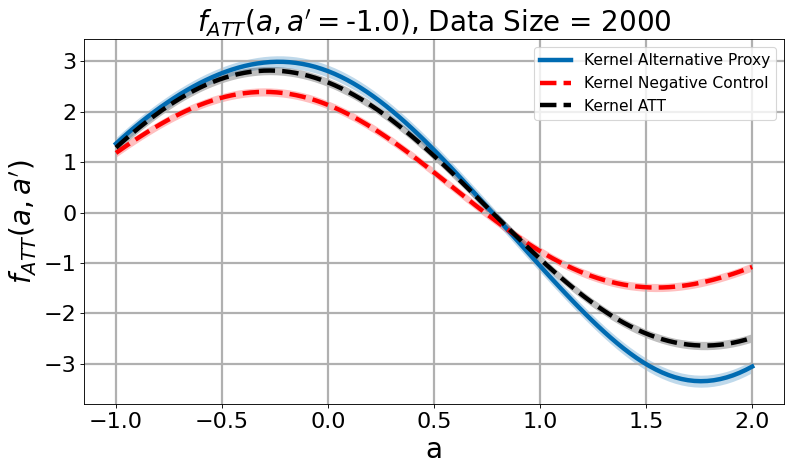

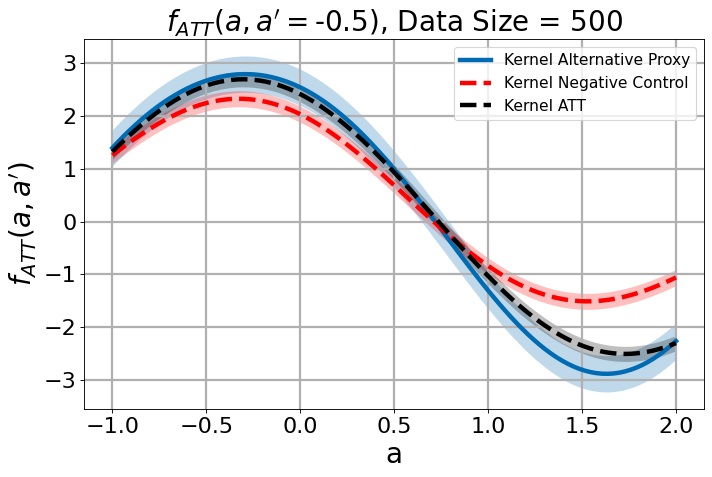

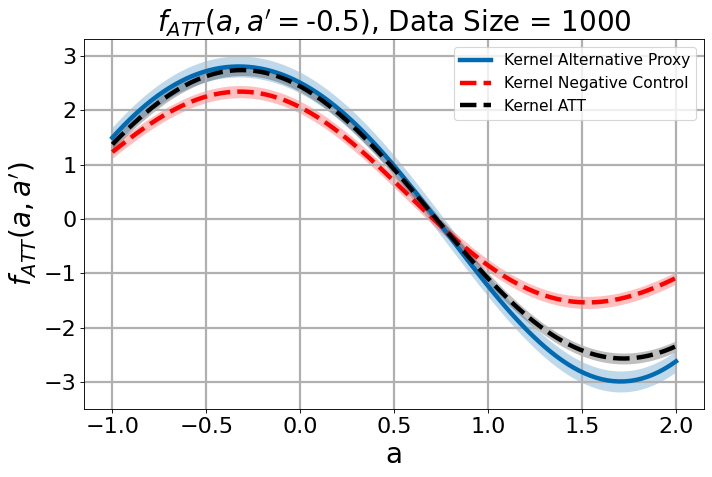

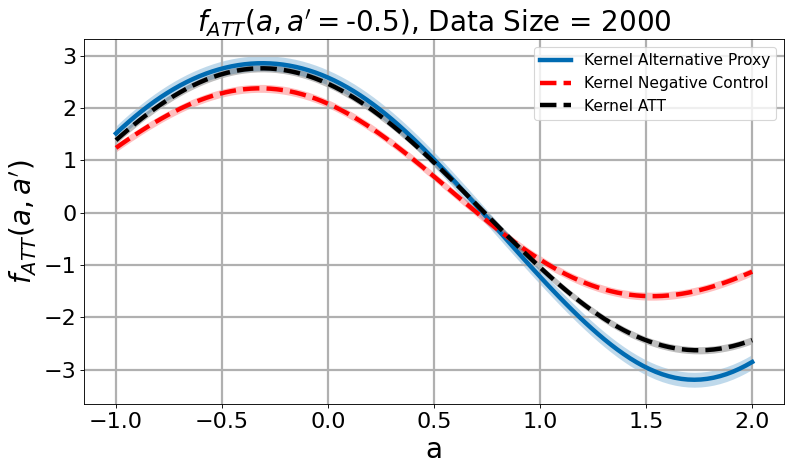

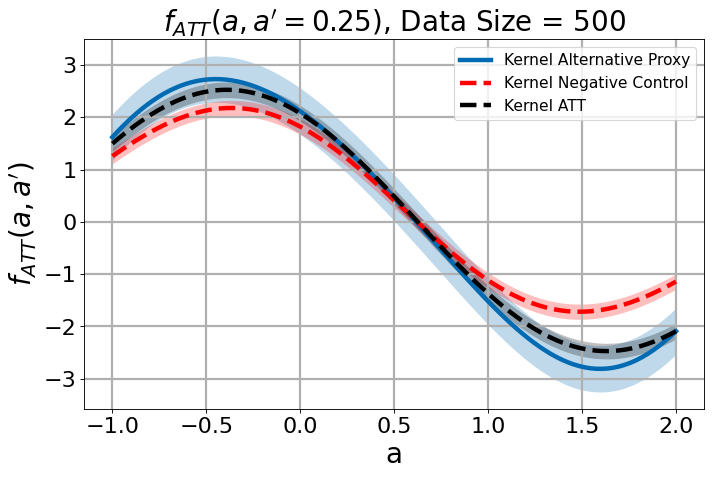

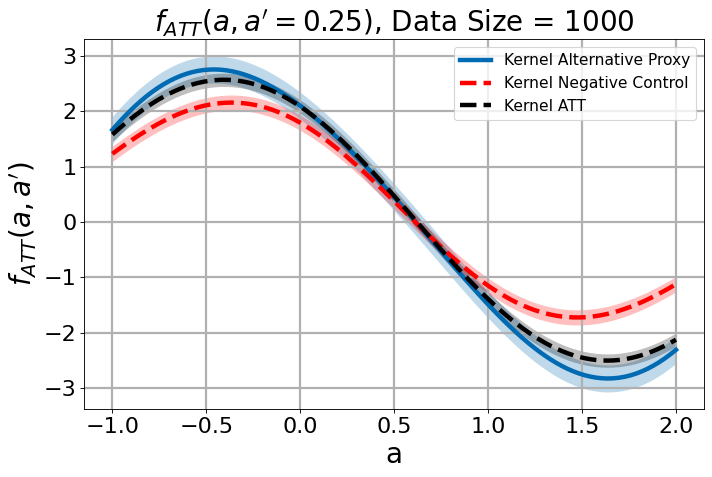

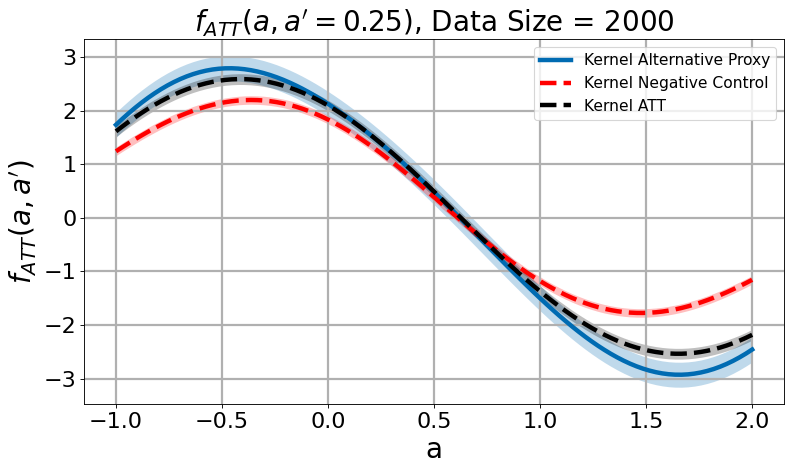

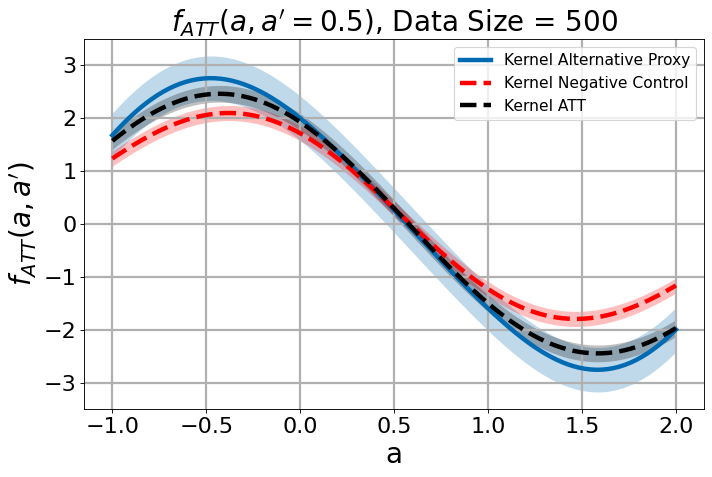

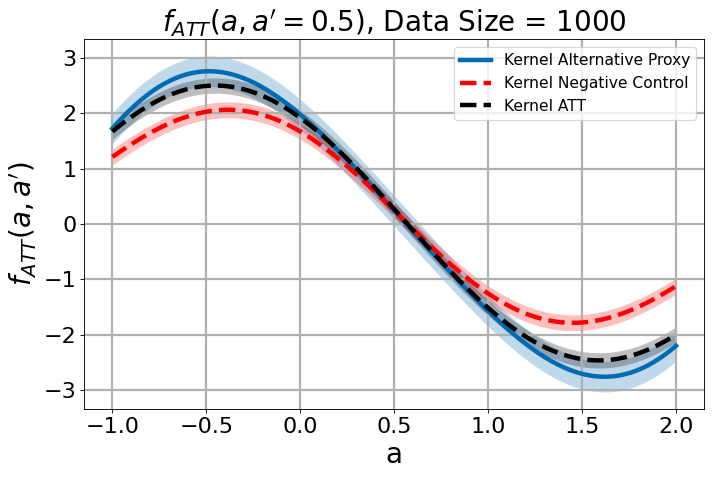

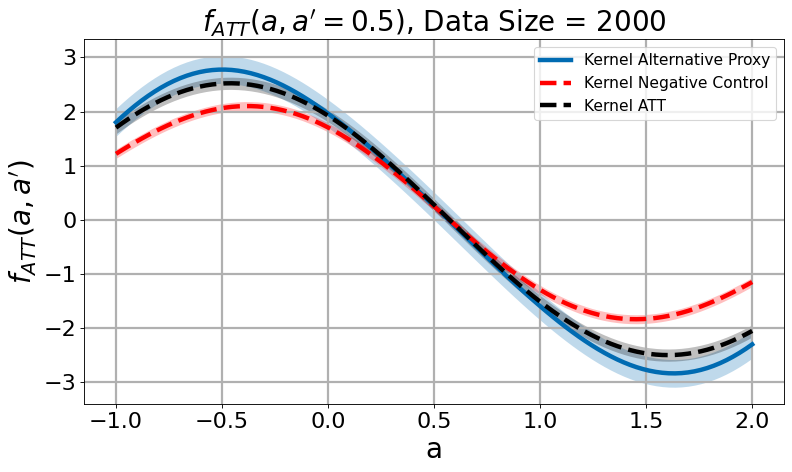

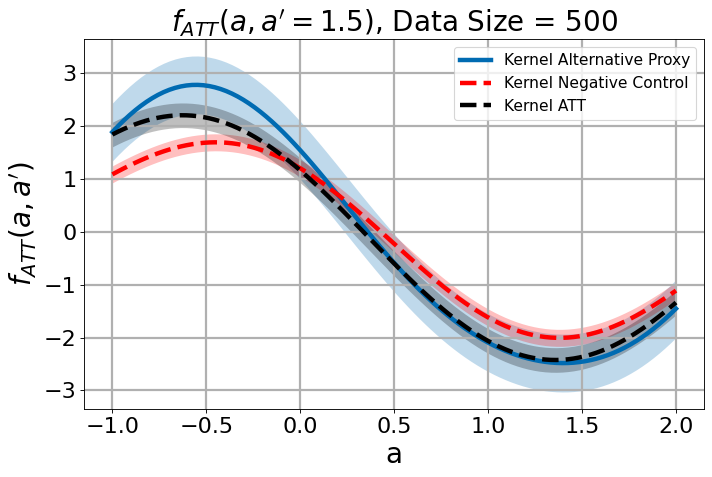

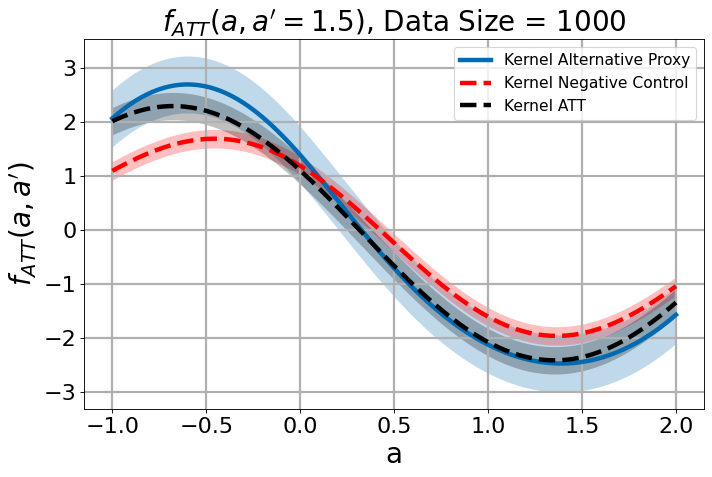

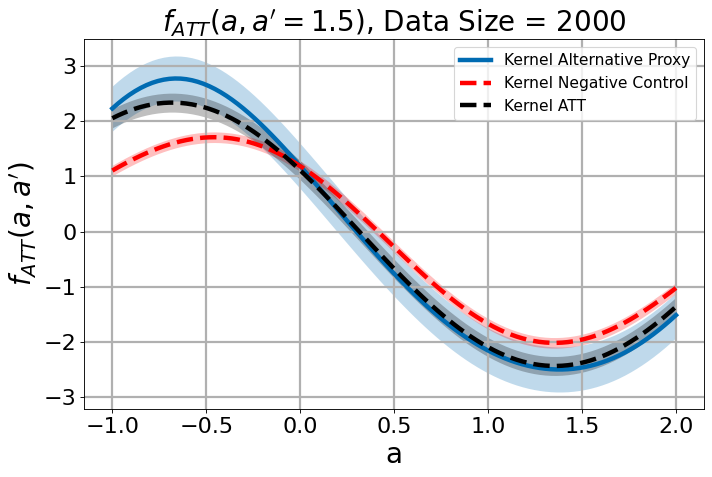

In [4]:
counter = 0
do_A_size = 100
do_A_range = (-1, 2)
do_A = np.linspace(do_A_range[0], do_A_range[1], do_A_size)
sigma_square_ = 0.

for a_prime in df_results_aggregated['a_prime'].unique():
    for data_size in df_results_aggregated['Data_Size'].unique():
        counter += 1
        
        df_results_data_size = df_results_aggregated.loc[df_results_aggregated['Data_Size'] == data_size]
        
        kernel_alternative_proxy_estimate = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_Altenative_Proxy') & (df_results_data_size['a_prime'] == a_prime) & (df_results_data_size['sigma_square'] == sigma_square_)]['ATT_mean'].values[0]
        kernel_alternative_proxy_std = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_Altenative_Proxy') & (df_results_data_size['a_prime'] == a_prime) & (df_results_data_size['sigma_square'] == sigma_square_)]['ATT_std'].values[0]
        
        kernel_negative_control_estimate = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_Negative_Control') & (df_results_data_size['a_prime'] == a_prime)]['ATT_mean'].values[0]
        kernel_negative_control_std = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_Negative_Control') & (df_results_data_size['a_prime'] == a_prime)]['ATT_std'].values[0]
        
        kernel_ATT_estimate = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_ATT') & (df_results_data_size['a_prime'] == a_prime)]['ATT_mean'].values[0]
        kernel_ATT_std = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_ATT') & (df_results_data_size['a_prime'] == a_prime)]['ATT_std'].values[0]
        
        
        SetPlotRC()
        x = do_A
        fh2=plt.figure(figsize=(10, 6), dpi=80)
        plt.plot(x, kernel_alternative_proxy_estimate, linewidth=4, color='#006BB2', label = 'Kernel Alternative Proxy')
        plt.fill_between(x, (kernel_alternative_proxy_estimate + kernel_alternative_proxy_std)[:,0], (kernel_alternative_proxy_estimate - kernel_alternative_proxy_std)[:,0], alpha=0.25, linewidth=0, color='#006BB2')
        plt.plot(x, kernel_negative_control_estimate, linewidth=4, color='r', linestyle = '--', label = 'Kernel Negative Control')
        plt.fill_between(x, (kernel_negative_control_estimate + kernel_negative_control_std)[:,0], (kernel_negative_control_estimate - kernel_negative_control_std)[:,0], alpha=0.25, linewidth=0, color='r')
        plt.plot(x, kernel_ATT_estimate, linewidth=4, color='k', linestyle = '--', label = 'Kernel ATT')
        plt.fill_between(x, (kernel_ATT_estimate + kernel_ATT_std)[:,0], (kernel_ATT_estimate - kernel_ATT_std)[:,0], alpha=0.25, linewidth=0, color='k')
        plt.grid(linewidth=2.0)
        plt.legend(fontsize = 14)
        plt.xlabel("a")
        plt.ylabel(r"$f_{{ATT}}(a, a')$")
        plt.title(r"$f_{{ATT}}(a, a' = $" + "{}".format(a_prime) + "$)$, Data Size = {}".format(data_size))
        ApplyFont(plt.gca(), xlabel_text_size = 25.0, ylabel_text_size = 25.0, title_text_size = 25.0, ticks_text_size = 20,)
        if (counter == 3) | (counter == 6) | (counter == 9) | (counter == 12):
            plt.tight_layout()
            plt.savefig('Figures/Alternative_Proxy_ATT_Comparison_{}.pdf'.format(counter), format='pdf')
        plt.show()

## Ablation Studies for $\sigma^2$

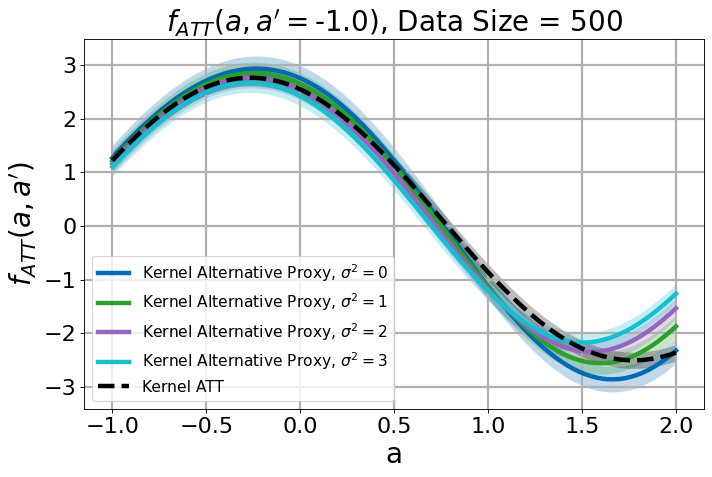

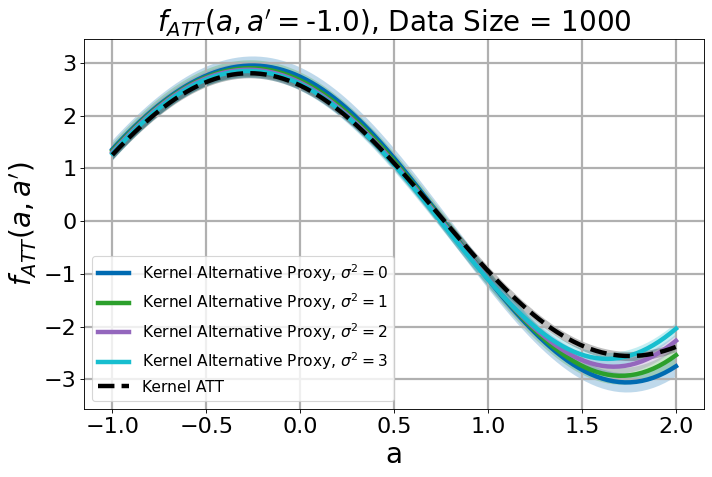

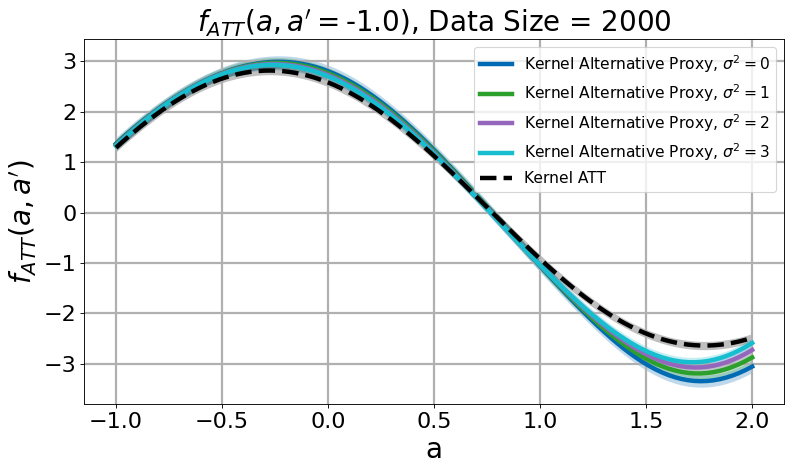

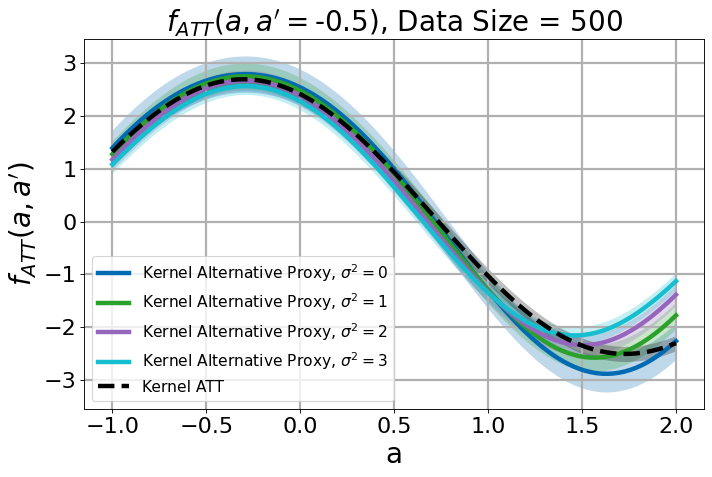

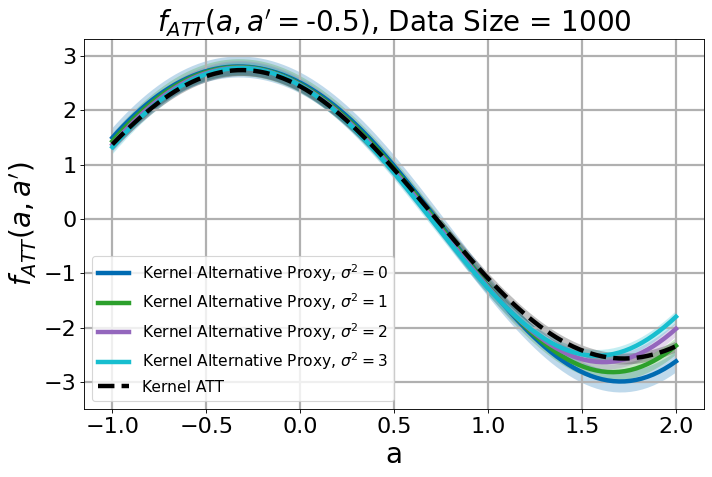

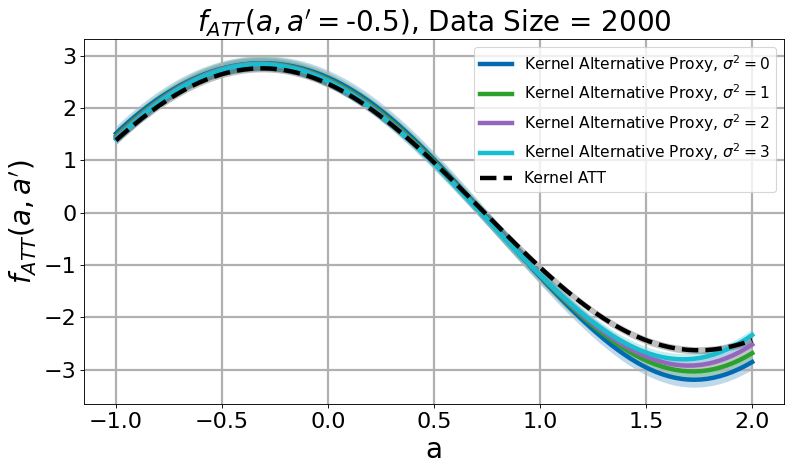

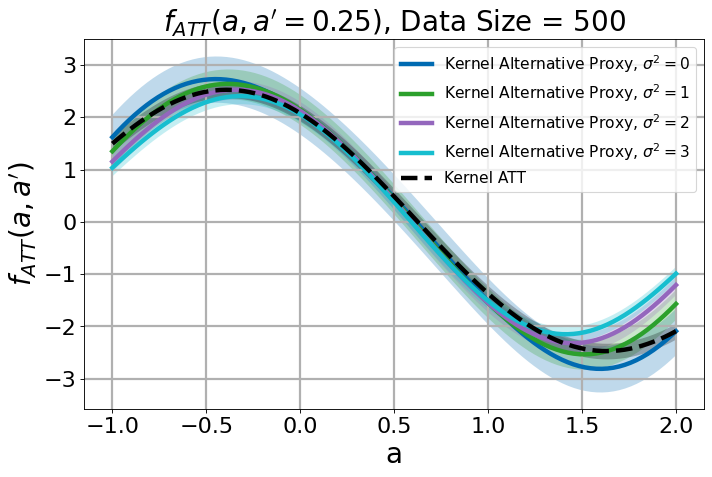

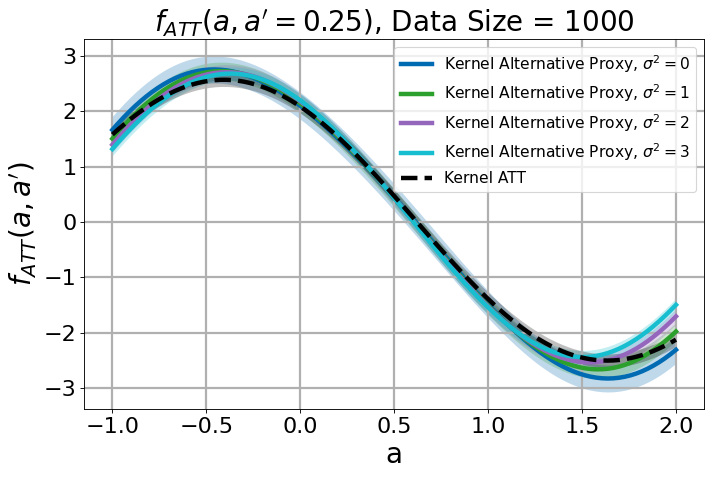

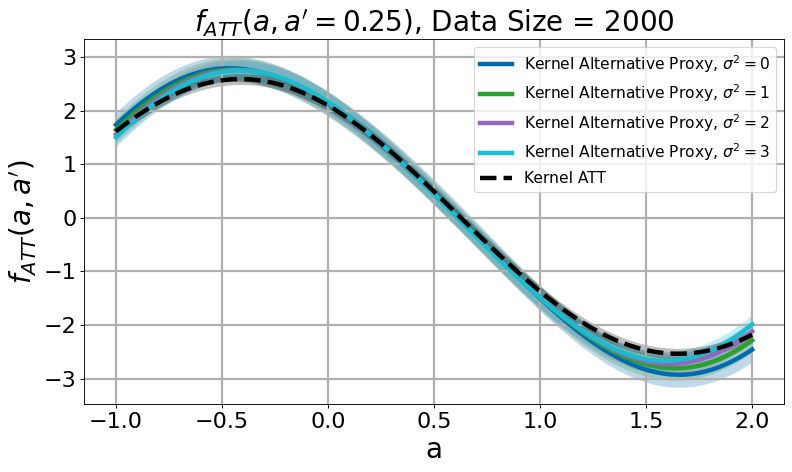

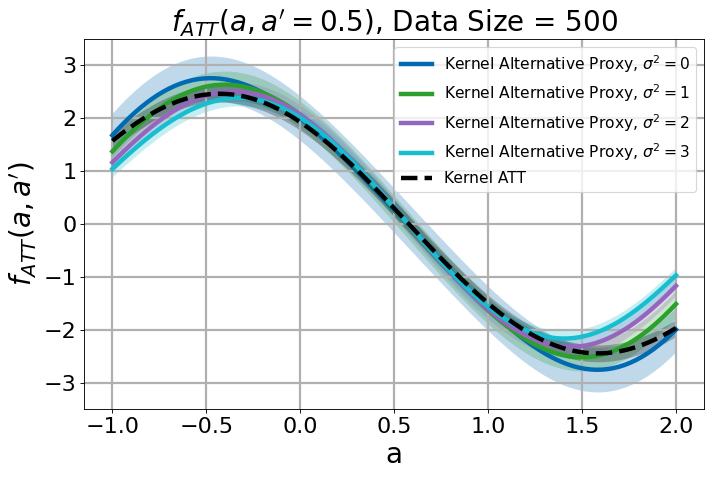

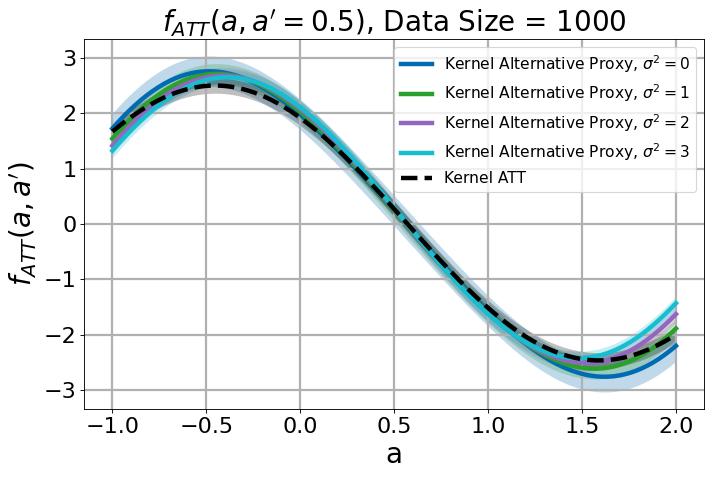

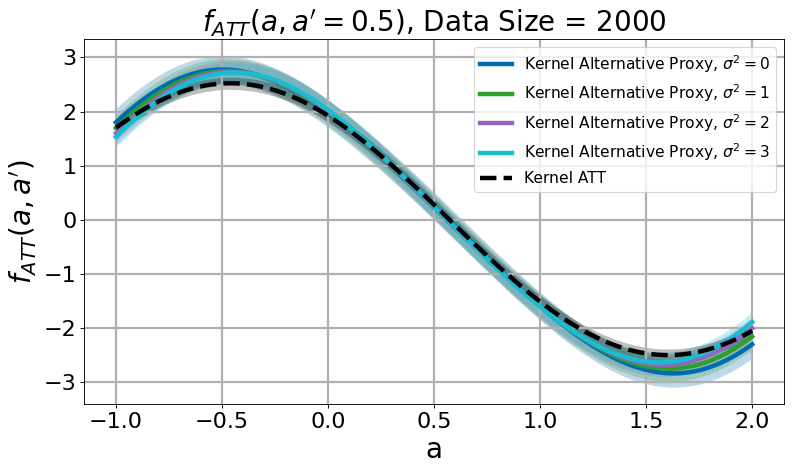

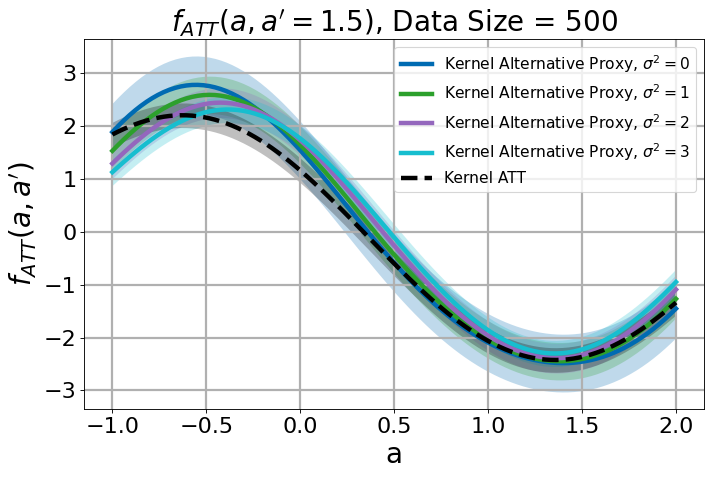

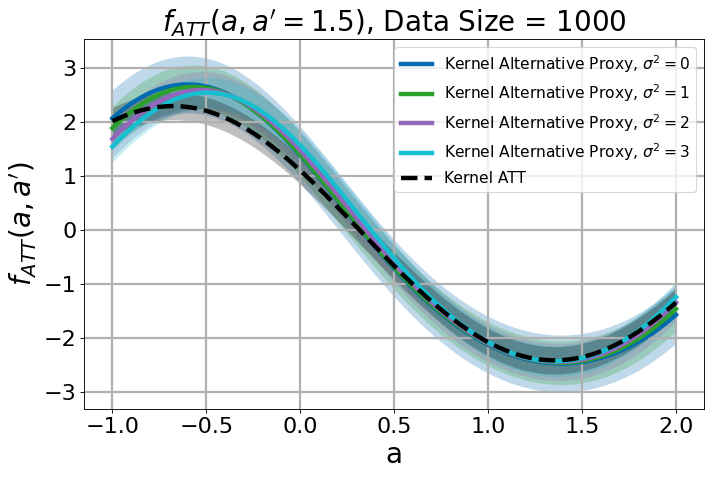

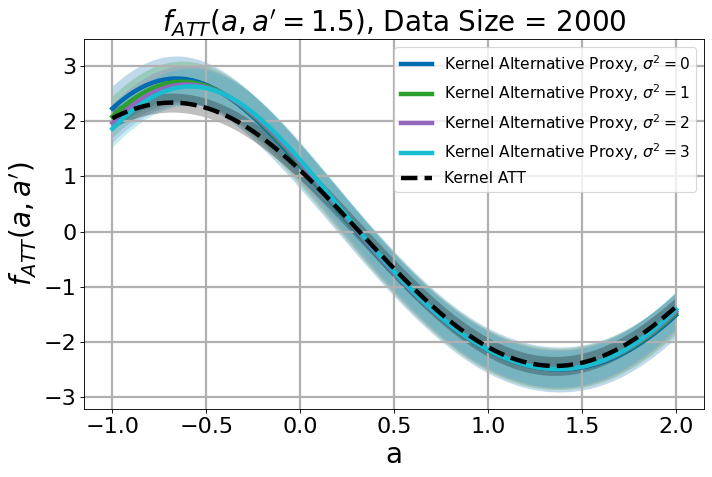

In [5]:
counter = 0
do_A_size = 100
do_A_range = (-1, 2)
do_A = np.linspace(do_A_range[0], do_A_range[1], do_A_size)
sigma_square_ = 0.

for a_prime in df_results_aggregated['a_prime'].unique():
    for data_size in df_results_aggregated['Data_Size'].unique():
        counter += 1
        
        df_results_data_size = df_results_aggregated.loc[df_results_aggregated['Data_Size'] == data_size]
        
        kernel_alternative_proxy_estimate_0 = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_Altenative_Proxy') & (df_results_data_size['a_prime'] == a_prime) & (df_results_data_size['sigma_square'] == 0.)]['ATT_mean'].values[0]
        kernel_alternative_proxy_std_0 = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_Altenative_Proxy') & (df_results_data_size['a_prime'] == a_prime) & (df_results_data_size['sigma_square'] == 0.)]['ATT_std'].values[0]

        kernel_alternative_proxy_estimate_1 = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_Altenative_Proxy') & (df_results_data_size['a_prime'] == a_prime) & (df_results_data_size['sigma_square'] == 1.)]['ATT_mean'].values[0]
        kernel_alternative_proxy_std_1 = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_Altenative_Proxy') & (df_results_data_size['a_prime'] == a_prime) & (df_results_data_size['sigma_square'] == 1.)]['ATT_std'].values[0]

        kernel_alternative_proxy_estimate_2 = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_Altenative_Proxy') & (df_results_data_size['a_prime'] == a_prime) & (df_results_data_size['sigma_square'] == 2.)]['ATT_mean'].values[0]
        kernel_alternative_proxy_std_2 = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_Altenative_Proxy') & (df_results_data_size['a_prime'] == a_prime) & (df_results_data_size['sigma_square'] == 2.)]['ATT_std'].values[0]

        kernel_alternative_proxy_estimate_3 = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_Altenative_Proxy') & (df_results_data_size['a_prime'] == a_prime) & (df_results_data_size['sigma_square'] == 3.)]['ATT_mean'].values[0]
        kernel_alternative_proxy_std_3 = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_Altenative_Proxy') & (df_results_data_size['a_prime'] == a_prime) & (df_results_data_size['sigma_square'] == 3.)]['ATT_std'].values[0]
        
        kernel_ATT_estimate = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_ATT') & (df_results_data_size['a_prime'] == a_prime)]['ATT_mean'].values[0]
        kernel_ATT_std = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_ATT') & (df_results_data_size['a_prime'] == a_prime)]['ATT_std'].values[0]
        
        
        SetPlotRC()
        x = do_A
        fh2=plt.figure(figsize=(10, 6), dpi=80)
        plt.plot(x, kernel_alternative_proxy_estimate_0, linewidth=4, color='#006BB2', label = r'Kernel Alternative Proxy, $\sigma^2 = 0$')
        plt.fill_between(x, (kernel_alternative_proxy_estimate_0 + kernel_alternative_proxy_std_0)[:,0], (kernel_alternative_proxy_estimate_0 - kernel_alternative_proxy_std_0)[:,0], alpha=0.25, linewidth=0, color='#006BB2')
        
        plt.plot(x, kernel_alternative_proxy_estimate_1, linewidth=4, color='#2ca02c', label = r'Kernel Alternative Proxy, $\sigma^2 = 1$')
        plt.fill_between(x, (kernel_alternative_proxy_estimate_1 + kernel_alternative_proxy_std_1)[:,0], (kernel_alternative_proxy_estimate_1 - kernel_alternative_proxy_std_1)[:,0], alpha=0.25, linewidth=0, color='#2ca02c')

        plt.plot(x, kernel_alternative_proxy_estimate_2, linewidth=4, color='#9467bd', label = r'Kernel Alternative Proxy, $\sigma^2 = 2$')
        plt.fill_between(x, (kernel_alternative_proxy_estimate_2 + kernel_alternative_proxy_std_2)[:,0], (kernel_alternative_proxy_estimate_2 - kernel_alternative_proxy_std_2)[:,0], alpha=0.25, linewidth=0, color='#9467bd')

        plt.plot(x, kernel_alternative_proxy_estimate_3, linewidth=4, color='#17becf', label = r'Kernel Alternative Proxy, $\sigma^2 = 3$')
        plt.fill_between(x, (kernel_alternative_proxy_estimate_3 + kernel_alternative_proxy_std_3)[:,0], (kernel_alternative_proxy_estimate_3 - kernel_alternative_proxy_std_3)[:,0], alpha=0.25, linewidth=0, color='#17becf')
        
        plt.plot(x, kernel_ATT_estimate, linewidth=4, color='k', linestyle = '--', label = 'Kernel ATT')
        plt.fill_between(x, (kernel_ATT_estimate + kernel_ATT_std)[:,0], (kernel_ATT_estimate - kernel_ATT_std)[:,0], alpha=0.25, linewidth=0, color='k')
        
        plt.grid(linewidth=2.0)
        plt.legend(fontsize = 14)
        plt.xlabel("a")
        plt.ylabel(r"$f_{{ATT}}(a, a')$")
        plt.title(r"$f_{{ATT}}(a, a' = $" + "{}".format(a_prime) + "$)$, Data Size = {}".format(data_size))
        ApplyFont(plt.gca(), xlabel_text_size = 25.0, ylabel_text_size = 25.0, title_text_size = 25.0, ticks_text_size = 20,)
        if (counter == 3) | (counter == 6) | (counter == 9) | (counter == 12):
            plt.tight_layout()
            plt.savefig('Figures/Alternative_Proxy_ATT_Ablation_{}.pdf'.format(counter), format='pdf')
        plt.show()

# Job Corps Data Simulation - Misspecified Setting 1.1

In [6]:
df_results = pd.read_pickle(r"../Results/JobCorps_ATT_Estimation_Comparison_Misspecified_Setting1.1.pkl")
df_results.loc[df_results['sigma_square'].isnull(), 'sigma_square'] = -1.
df_results.loc[df_results['alternative_proxy_eta_parameter'].isnull(), 'alternative_proxy_eta_parameter'] = -1.
df_results = df_results.drop(['alternative_proxy_eta_parameter'], axis=1)

def popstd(x):
    return np.concatenate(x.values, axis = 1).std(1)
    
def reshape_1_1(x):
    return np.array(x).reshape(-1, 1)

df_results["ATT_Estimation"] = df_results["ATT_Estimation"].apply(reshape_1_1)
df_results_aggregated = df_results.groupby(['Algorithm', 'Data_Size', 'a_prime', 'sigma_square']).agg({ 'ATT_Estimation':['mean', popstd]}).set_axis(['ATT_mean', 'ATT_std'], axis=1).reset_index()
# df_results_aggregated = df_results.groupby(['Algorithm', 'Data_Size', 'a_prime', 'sigma_square']).agg({ 'ATT_Estimation':['mean']}).set_axis(['ATT_mean'], axis=1).reset_index()

print(df_results["Algorithm"].unique())
print(df_results.shape)

df_results_aggregated.head()

['Kernel_Alternative_Proxy' 'Kernel_Negative_Control' 'Kernel_ATT']
(40, 7)


Algorithm  Data_Size  a_prime  sigma_square  \
0                Kernel_ATT       2913      500          -1.0   
1                Kernel_ATT       2913     1000          -1.0   
2  Kernel_Alternative_Proxy       2913      500           0.0   
3  Kernel_Alternative_Proxy       2913      500           1.0   
4  Kernel_Alternative_Proxy       2913     1000           0.0   

                                            ATT_mean  \
0  [[53.222065], [53.29293], [53.363445], [53.433...   
1  [[53.362354], [53.431435], [53.50016], [53.568...   
2  [[49.70517655575695], [49.81844707567325], [49...   
3  [[46.611156629115136], [46.729552158828255], [...   
4  [[48.70271812405508], [48.82055620062552], [48...   

                                             ATT_std  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 3.8146973e-06, 0.0, ...  
1  [0.0, 0.0, 3.8146973e-06, 0.0, 0.0, 0.0, 0.0, ...  
2  [0.7557210078081245, 0.7491760080545156, 0.742...  
3  [1.0630549297539236, 1.0590959865653478, 1.055...  
4  [1.2269108321850581, 1.2247110678002184, 1.222...

In [7]:
a_prime = 500
gt_ate = df_results.loc[(df_results['Algorithm'] == "Kernel_ATT") & (df_results['a_prime'] == a_prime), "ATT_Estimation"].values[0]

kap_ate_estimation = np.concatenate(df_results.loc[(df_results['Algorithm'] == "Kernel_Alternative_Proxy") & (df_results['sigma_square'] == 0.) & (df_results['a_prime'] == a_prime), "ATT_Estimation"].values, 1)

knc_ate_estimation = np.concatenate(df_results.loc[(df_results['Algorithm'] == "Kernel_Negative_Control"), "ATT_Estimation"].values, 1)

kap_mses = ((kap_ate_estimation - gt_ate.reshape(-1, 1)) ** 2).mean(0)
knc_mses = ((knc_ate_estimation - gt_ate.reshape(-1, 1)) ** 2).mean(0)

df_mse = pd.DataFrame(columns = ["Algorithm", "MSE", "Std"])

df_mse = pd.concat([df_mse, pd.DataFrame([{"Algorithm" : "Kernel Alternative Proxy", "MSE" : kap_mses.mean(), "Std" : kap_mses.std() }])], ignore_index=True )
df_mse = pd.concat([df_mse, pd.DataFrame([{"Algorithm" : "Kernel Negative Control", "MSE" : knc_mses.mean(), "Std" : knc_mses.std() }])], ignore_index=True )
df_mse

Algorithm       MSE       Std
0  Kernel Alternative Proxy  1.110443  0.303488
1   Kernel Negative Control  4.425032  1.649688

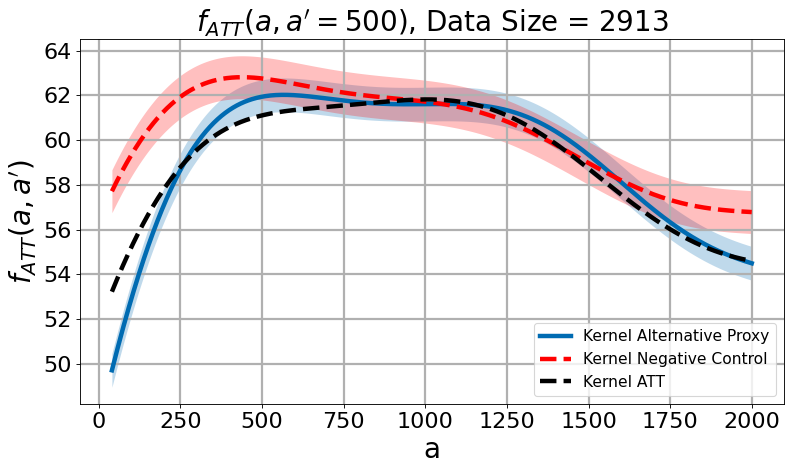

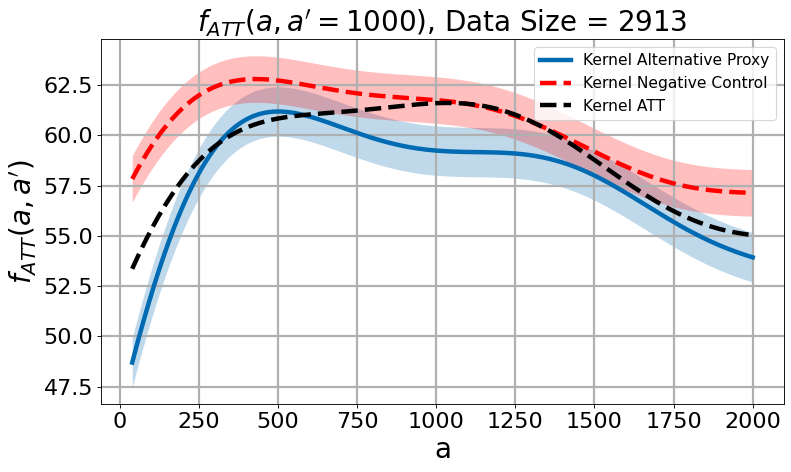

In [8]:
counter = 0
do_A_range = (40, 2000)
do_A = np.linspace(40, 2000, 1000)[:, np.newaxis].reshape(-1)
do_A_size = do_A.shape[0]
sigma_square_ = 0.

for a_prime in df_results_aggregated['a_prime'].unique():
    for data_size in df_results_aggregated['Data_Size'].unique():
        counter += 1
        
        df_results_data_size = df_results_aggregated.loc[df_results_aggregated['Data_Size'] == data_size]
        
        kernel_alternative_proxy_estimate = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_Alternative_Proxy') & (df_results_data_size['a_prime'] == a_prime) & (df_results_data_size['sigma_square'] == sigma_square_)]['ATT_mean'].values[0]
        kernel_alternative_proxy_std = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_Alternative_Proxy') & (df_results_data_size['a_prime'] == a_prime) & (df_results_data_size['sigma_square'] == sigma_square_)]['ATT_std'].values[0]
        
        kernel_negative_control_estimate = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_Negative_Control') & (df_results_data_size['a_prime'] == a_prime)]['ATT_mean'].values[0]
        kernel_negative_control_std = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_Negative_Control') & (df_results_data_size['a_prime'] == a_prime)]['ATT_std'].values[0]
        
        kernel_ATT_estimate = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_ATT') & (df_results_data_size['a_prime'] == a_prime)]['ATT_mean'].values[0]
        kernel_ATT_std = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_ATT') & (df_results_data_size['a_prime'] == a_prime)]['ATT_std'].values[0]
        
        
        SetPlotRC()
        x = do_A
        fh2=plt.figure(figsize=(10, 6), dpi=80)
        plt.plot(x, kernel_alternative_proxy_estimate, linewidth=4, color='#006BB2', label = 'Kernel Alternative Proxy')
        plt.fill_between(x, (kernel_alternative_proxy_estimate + kernel_alternative_proxy_std)[:,0], (kernel_alternative_proxy_estimate - kernel_alternative_proxy_std)[:,0], alpha=0.25, linewidth=0, color='#006BB2')
        plt.plot(x, kernel_negative_control_estimate, linewidth=4, color='r', linestyle = '--', label = 'Kernel Negative Control')
        plt.fill_between(x, (kernel_negative_control_estimate + kernel_negative_control_std)[:,0], (kernel_negative_control_estimate - kernel_negative_control_std)[:,0], alpha=0.25, linewidth=0, color='r')
        plt.plot(x, kernel_ATT_estimate, linewidth=4, color='k', linestyle = '--', label = 'Kernel ATT')
        plt.fill_between(x, (kernel_ATT_estimate + kernel_ATT_std)[:,0], (kernel_ATT_estimate - kernel_ATT_std)[:,0], alpha=0.25, linewidth=0, color='k')
        plt.grid(linewidth=2.0)
        plt.legend(fontsize = 14)
        plt.xlabel("a")
        plt.ylabel(r"$f_{{ATT}}(a, a')$")
        plt.title(r"$f_{{ATT}}(a, a' = $" + "{}".format(a_prime) + "$)$, Data Size = {}".format(data_size))
        ApplyFont(plt.gca(), xlabel_text_size = 25.0, ylabel_text_size = 25.0, title_text_size = 25.0, ticks_text_size = 20,)
        if (counter == 1) | (counter == 2):
            plt.tight_layout()
            plt.savefig('Figures/Alternative_Proxy_ATT_JobCorps_Comparison_Misspecified_Setting1.1_{}.pdf'.format(counter), format='pdf')
        plt.show()

### Plot side by side for rebuttal

In [9]:
# counter = 0
# do_A_range = (40, 2000)
# do_A = np.linspace(40, 2000, 1000)[:, np.newaxis].reshape(-1)
# do_A_size = do_A.shape[0]
# sigma_square_ = 0.

# fig = plt.figure(figsize = (22,8))
# for a_prime in df_results_aggregated['a_prime'].unique()[:2]:
#     for data_size in df_results_aggregated['Data_Size'].unique():
#         counter += 1
        
#         df_results_data_size = df_results_aggregated.loc[df_results_aggregated['Data_Size'] == data_size]
        
#         kernel_alternative_proxy_estimate = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_Alternative_Proxy') & (df_results_data_size['a_prime'] == a_prime) & (df_results_data_size['sigma_square'] == sigma_square_)]['ATT_mean'].values[0]
#         kernel_alternative_proxy_std = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_Alternative_Proxy') & (df_results_data_size['a_prime'] == a_prime) & (df_results_data_size['sigma_square'] == sigma_square_)]['ATT_std'].values[0]
        
#         kernel_negative_control_estimate = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_Negative_Control') & (df_results_data_size['a_prime'] == a_prime)]['ATT_mean'].values[0]
#         kernel_negative_control_std = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_Negative_Control') & (df_results_data_size['a_prime'] == a_prime)]['ATT_std'].values[0]
        
#         kernel_ATT_estimate = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_ATT') & (df_results_data_size['a_prime'] == a_prime)]['ATT_mean'].values[0]
#         kernel_ATT_std = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_ATT') & (df_results_data_size['a_prime'] == a_prime)]['ATT_std'].values[0]
        
        
#         SetPlotRC()
#         x = do_A
#         plt.subplot(1,2, counter)
#         plt.plot(x, kernel_alternative_proxy_estimate, linewidth=4, color='#006BB2', label = 'Kernel Alternative Proxy')
#         plt.fill_between(x, (kernel_alternative_proxy_estimate + kernel_alternative_proxy_std)[:,0], (kernel_alternative_proxy_estimate - kernel_alternative_proxy_std)[:,0], alpha=0.25, linewidth=0, color='#006BB2')
#         plt.plot(x, kernel_negative_control_estimate, linewidth=4, color='r', linestyle = '--', label = 'Kernel Negative Control')
#         plt.fill_between(x, (kernel_negative_control_estimate + kernel_negative_control_std)[:,0], (kernel_negative_control_estimate - kernel_negative_control_std)[:,0], alpha=0.25, linewidth=0, color='r')
#         plt.plot(x, kernel_ATT_estimate, linewidth=4, color='k', linestyle = '--', label = 'Kernel ATT')
#         plt.fill_between(x, (kernel_ATT_estimate + kernel_ATT_std)[:,0], (kernel_ATT_estimate - kernel_ATT_std)[:,0], alpha=0.25, linewidth=0, color='k')
#         plt.grid(linewidth=2.0)
#         plt.legend(fontsize = 14)
#         plt.xlabel("a")
#         plt.ylabel(r"$f_{{ATT}}(a, a')$")
#         plt.title(r"$f_{{ATT}}(a, a' =  {})$".format(a_prime))
#         ApplyFont(plt.gca(), xlabel_text_size = 25.0, ylabel_text_size = 25.0, title_text_size = 25.0, ticks_text_size = 20,)

    
# plt.savefig('Figures/Alternative_Proxy_JobCorps_ATT_Comparison_Misspecified_Setting1.pdf', format='pdf')
# plt.show()

# Job Corps Data Simulation - Misspecified Setting 1.2

In [10]:
df_results = pd.read_pickle(r"../Results/JobCorps_ATT_Estimation_Comparison_Misspecified_Setting1.2.pkl")
df_results.loc[df_results['sigma_square'].isnull(), 'sigma_square'] = -1.
df_results.loc[df_results['alternative_proxy_eta_parameter'].isnull(), 'alternative_proxy_eta_parameter'] = -1.

def popstd(x):
    return np.concatenate(x.values, axis = 1).std(1)
def reshape_1_1(x):
    return np.array(x).reshape(-1, 1)

df_results["ATT_Estimation"] = df_results["ATT_Estimation"].apply(reshape_1_1)
df_results_aggregated = df_results.groupby(['Algorithm', 'Data_Size', 'a_prime', 'sigma_square']).agg({ 'ATT_Estimation':['mean', popstd]}).set_axis(['ATT_mean', 'ATT_std'], axis=1).reset_index()

print(df_results["Algorithm"].unique())
print(df_results.shape)

df_results_aggregated.head()

['Kernel_Alternative_Proxy' 'Kernel_Negative_Control' 'Kernel_ATT']
(40, 8)


Algorithm  Data_Size  a_prime  sigma_square  \
0                Kernel_ATT       2913      500          -1.0   
1                Kernel_ATT       2913     1000          -1.0   
2  Kernel_Alternative_Proxy       2913      500           0.0   
3  Kernel_Alternative_Proxy       2913      500           1.0   
4  Kernel_Alternative_Proxy       2913     1000           0.0   

                                            ATT_mean  \
0  [[53.222065], [53.29293], [53.363445], [53.433...   
1  [[53.362354], [53.431435], [53.50016], [53.568...   
2  [[52.962916788335136], [53.06741394307892], [5...   
3  [[48.06391722714206], [48.18277392735895], [48...   
4  [[51.44694271806075], [51.55998498126824], [51...   

                                             ATT_std  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 3.8146973e-06, 0.0, ...  
1  [0.0, 0.0, 3.8146973e-06, 0.0, 0.0, 0.0, 0.0, ...  
2  [1.1521766309234986, 1.1441770921370833, 1.136...  
3  [1.2786686886399183, 1.275706855275299, 1.2727...  
4  [1.6264851149296282, 1.6179801777861347, 1.609...

In [11]:
a_prime = 500
gt_ate = df_results.loc[(df_results['Algorithm'] == "Kernel_ATT") & (df_results['a_prime'] == a_prime), "ATT_Estimation"].values[0]

kap_ate_estimation = np.concatenate(df_results.loc[(df_results['Algorithm'] == "Kernel_Alternative_Proxy") & (df_results['sigma_square'] == 0.) & (df_results['a_prime'] == a_prime), "ATT_Estimation"].values, 1)

knc_ate_estimation = np.concatenate(df_results.loc[(df_results['Algorithm'] == "Kernel_Negative_Control"), "ATT_Estimation"].values, 1)

kap_mses = ((kap_ate_estimation - gt_ate.reshape(-1, 1)) ** 2).mean(0)
knc_mses = ((knc_ate_estimation - gt_ate.reshape(-1, 1)) ** 2).mean(0)

df_mse = pd.DataFrame(columns = ["Algorithm", "MSE", "Std"])

df_mse = pd.concat([df_mse, pd.DataFrame([{"Algorithm" : "Kernel Alternative Proxy", "MSE" : kap_mses.mean(), "Std" : kap_mses.std() }])], ignore_index=True )
df_mse = pd.concat([df_mse, pd.DataFrame([{"Algorithm" : "Kernel Negative Control", "MSE" : knc_mses.mean(), "Std" : knc_mses.std() }])], ignore_index=True )
df_mse

Algorithm       MSE       Std
0  Kernel Alternative Proxy  5.397764  1.929596
1   Kernel Negative Control  2.371177  0.879361

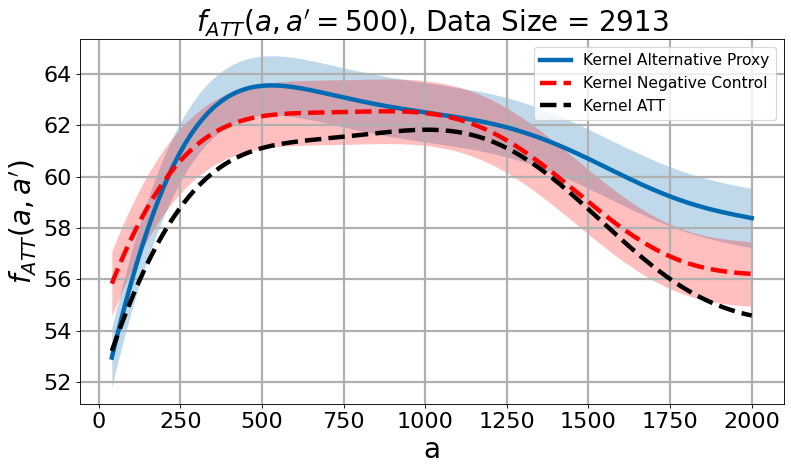

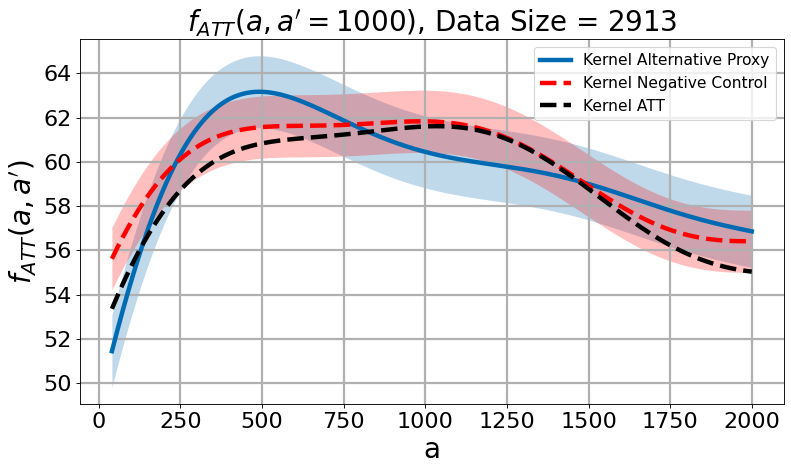

In [12]:
counter = 0
do_A_range = (40, 2000)
do_A = np.linspace(40, 2000, 1000)[:, np.newaxis].reshape(-1)
do_A_size = do_A.shape[0]
sigma_square_ = 0.

for a_prime in df_results_aggregated['a_prime'].unique():
    for data_size in df_results_aggregated['Data_Size'].unique():
        counter += 1
        
        df_results_data_size = df_results_aggregated.loc[df_results_aggregated['Data_Size'] == data_size]
        
        kernel_alternative_proxy_estimate = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_Alternative_Proxy') & (df_results_data_size['a_prime'] == a_prime) & (df_results_data_size['sigma_square'] == sigma_square_)]['ATT_mean'].values[0]
        kernel_alternative_proxy_std = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_Alternative_Proxy') & (df_results_data_size['a_prime'] == a_prime) & (df_results_data_size['sigma_square'] == sigma_square_)]['ATT_std'].values[0]
        
        kernel_negative_control_estimate = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_Negative_Control') & (df_results_data_size['a_prime'] == a_prime)]['ATT_mean'].values[0]
        kernel_negative_control_std = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_Negative_Control') & (df_results_data_size['a_prime'] == a_prime)]['ATT_std'].values[0]
        
        kernel_ATT_estimate = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_ATT') & (df_results_data_size['a_prime'] == a_prime)]['ATT_mean'].values[0]
        kernel_ATT_std = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_ATT') & (df_results_data_size['a_prime'] == a_prime)]['ATT_std'].values[0]
        
        
        SetPlotRC()
        x = do_A
        fh2=plt.figure(figsize=(10, 6), dpi=80)
        plt.plot(x, kernel_alternative_proxy_estimate, linewidth=4, color='#006BB2', label = 'Kernel Alternative Proxy')
        plt.fill_between(x, (kernel_alternative_proxy_estimate + kernel_alternative_proxy_std)[:,0], (kernel_alternative_proxy_estimate - kernel_alternative_proxy_std)[:,0], alpha=0.25, linewidth=0, color='#006BB2')
        plt.plot(x, kernel_negative_control_estimate, linewidth=4, color='r', linestyle = '--', label = 'Kernel Negative Control')
        plt.fill_between(x, (kernel_negative_control_estimate + kernel_negative_control_std)[:,0], (kernel_negative_control_estimate - kernel_negative_control_std)[:,0], alpha=0.25, linewidth=0, color='r')
        plt.plot(x, kernel_ATT_estimate, linewidth=4, color='k', linestyle = '--', label = 'Kernel ATT')
        plt.fill_between(x, (kernel_ATT_estimate + kernel_ATT_std)[:,0], (kernel_ATT_estimate - kernel_ATT_std)[:,0], alpha=0.25, linewidth=0, color='k')
        plt.grid(linewidth=2.0)
        plt.legend(fontsize = 14)
        plt.xlabel("a")
        plt.ylabel(r"$f_{{ATT}}(a, a')$")
        plt.title(r"$f_{{ATT}}(a, a' = $" + "{}".format(a_prime) + "$)$, Data Size = {}".format(data_size))
        ApplyFont(plt.gca(), xlabel_text_size = 25.0, ylabel_text_size = 25.0, title_text_size = 25.0, ticks_text_size = 20,)
        if (counter == 1) | (counter == 2):
            plt.tight_layout()
            plt.savefig('Figures/Alternative_Proxy_ATT_JobCorps_Comparison_Misspecified_Setting1.2_{}.pdf'.format(counter), format='pdf')
        plt.show()

### Plot side by side for rebuttal

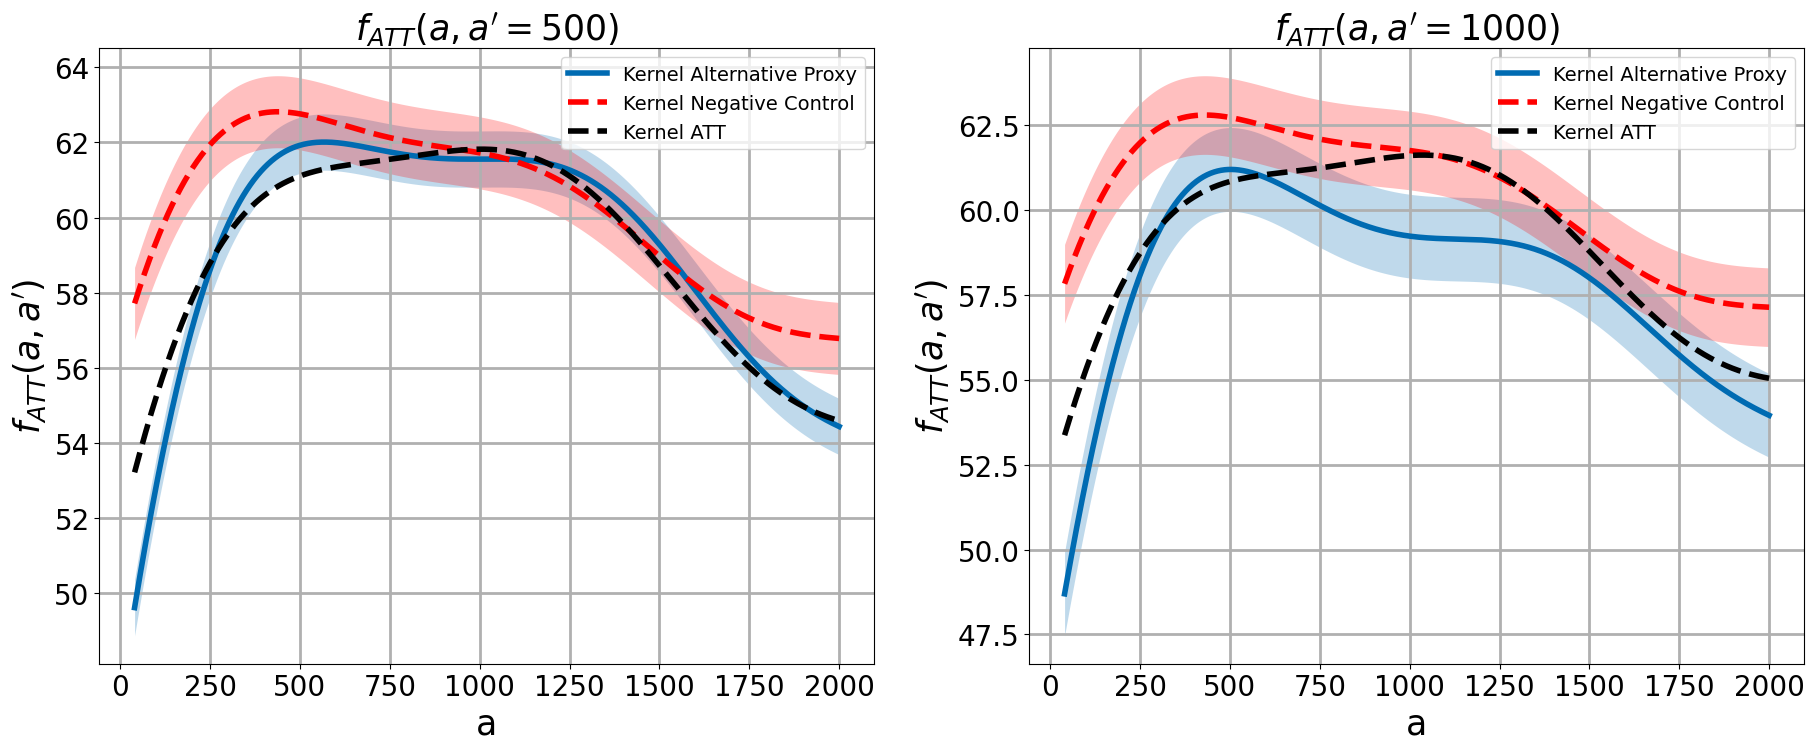

In [31]:
# counter = 0
# do_A_range = (40, 2000)
# do_A = np.linspace(40, 2000, 1000)[:, np.newaxis].reshape(-1)
# do_A_size = do_A.shape[0]
# sigma_square_ = 0.

# fig = plt.figure(figsize = (22,8))
# for a_prime in df_results_aggregated['a_prime'].unique()[:2]:
#     for data_size in df_results_aggregated['Data_Size'].unique():
#         counter += 1
        
#         df_results_data_size = df_results_aggregated.loc[df_results_aggregated['Data_Size'] == data_size]
        
#         kernel_alternative_proxy_estimate = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_Alternative_Proxy') & (df_results_data_size['a_prime'] == a_prime) & (df_results_data_size['sigma_square'] == sigma_square_)]['ATT_mean'].values[0]
#         kernel_alternative_proxy_std = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_Alternative_Proxy') & (df_results_data_size['a_prime'] == a_prime) & (df_results_data_size['sigma_square'] == sigma_square_)]['ATT_std'].values[0]
        
#         kernel_negative_control_estimate = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_Negative_Control') & (df_results_data_size['a_prime'] == a_prime)]['ATT_mean'].values[0]
#         kernel_negative_control_std = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_Negative_Control') & (df_results_data_size['a_prime'] == a_prime)]['ATT_std'].values[0]
        
#         kernel_ATT_estimate = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_ATT') & (df_results_data_size['a_prime'] == a_prime)]['ATT_mean'].values[0]
#         kernel_ATT_std = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_ATT') & (df_results_data_size['a_prime'] == a_prime)]['ATT_std'].values[0]
        
        
#         SetPlotRC()
#         x = do_A
#         plt.subplot(1,2, counter)
#         plt.plot(x, kernel_alternative_proxy_estimate, linewidth=4, color='#006BB2', label = 'Kernel Alternative Proxy')
#         plt.fill_between(x, (kernel_alternative_proxy_estimate + kernel_alternative_proxy_std)[:,0], (kernel_alternative_proxy_estimate - kernel_alternative_proxy_std)[:,0], alpha=0.25, linewidth=0, color='#006BB2')
#         plt.plot(x, kernel_negative_control_estimate, linewidth=4, color='r', linestyle = '--', label = 'Kernel Negative Control')
#         plt.fill_between(x, (kernel_negative_control_estimate + kernel_negative_control_std)[:,0], (kernel_negative_control_estimate - kernel_negative_control_std)[:,0], alpha=0.25, linewidth=0, color='r')
#         plt.plot(x, kernel_ATT_estimate, linewidth=4, color='k', linestyle = '--', label = 'Kernel ATT')
#         plt.fill_between(x, (kernel_ATT_estimate + kernel_ATT_std)[:,0], (kernel_ATT_estimate - kernel_ATT_std)[:,0], alpha=0.25, linewidth=0, color='k')
#         plt.grid(linewidth=2.0)
#         plt.legend(fontsize = 14)
#         plt.xlabel("a")
#         plt.ylabel(r"$f_{{ATT}}(a, a')$")
#         plt.title(r"$f_{{ATT}}(a, a' =  {})$".format(a_prime))
#         ApplyFont(plt.gca(), xlabel_text_size = 25.0, ylabel_text_size = 25.0, title_text_size = 25.0, ticks_text_size = 20,)

    
# plt.savefig('Figures/Alternative_Proxy_JobCorps_ATT_Comparison_Misspecified_Setting2.pdf', format='pdf')
# plt.show()

# Job Corps Data Simulation - Misspecified Setting 2.1

In [13]:
df_results = pd.read_pickle(r"../Results/JobCorps_ATT_Estimation_Comparison_Misspecified_Setting2.1.pkl")
df_results.loc[df_results['sigma_square'].isnull(), 'sigma_square'] = -1.
df_results.loc[df_results['alternative_proxy_eta_parameter'].isnull(), 'alternative_proxy_eta_parameter'] = -1.

def popstd(x):
    return np.concatenate(x.values, axis = 1).std(1)
def reshape_1_1(x):
    return np.array(x).reshape(-1, 1)

df_results["ATT_Estimation"] = df_results["ATT_Estimation"].apply(reshape_1_1)
df_results_aggregated = df_results.groupby(['Algorithm', 'Data_Size', 'a_prime', 'sigma_square']).agg({ 'ATT_Estimation':['mean', popstd]}).set_axis(['ATT_mean', 'ATT_std'], axis=1).reset_index()

print(df_results["Algorithm"].unique())
print(df_results.shape)

df_results_aggregated.head()

['Kernel_Alternative_Proxy' 'Kernel_Negative_Control' 'Kernel_ATT']
(40, 8)


Algorithm  Data_Size  a_prime  sigma_square  \
0                Kernel_ATT       2913      500          -1.0   
1                Kernel_ATT       2913     1000          -1.0   
2  Kernel_Alternative_Proxy       2913      500           0.0   
3  Kernel_Alternative_Proxy       2913      500           1.0   
4  Kernel_Alternative_Proxy       2913     1000           0.0   

                                            ATT_mean  \
0  [[53.222065], [53.29293], [53.363445], [53.433...   
1  [[53.362354], [53.431435], [53.50016], [53.568...   
2  [[48.58695205467866], [48.7050110302866], [48....   
3  [[43.64915641863261], [43.77639869212214], [43...   
4  [[47.72969567779137], [47.84998085268394], [47...   

                                             ATT_std  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 3.8146973e-06, 0.0, ...  
1  [0.0, 0.0, 3.8146973e-06, 0.0, 0.0, 0.0, 0.0, ...  
2  [0.4968169314558424, 0.49650993253749787, 0.49...  
3  [0.6306024586368101, 0.6311978431533494, 0.631...  
4  [0.9027192870768346, 0.9012740299017918, 0.899...

In [14]:
a_prime = 1000
gt_ate = df_results.loc[(df_results['Algorithm'] == "Kernel_ATT") & (df_results['a_prime'] == a_prime), "ATT_Estimation"].values[0]

kap_ate_estimation = np.concatenate(df_results.loc[(df_results['Algorithm'] == "Kernel_Alternative_Proxy") & (df_results['sigma_square'] == 0.) & (df_results['a_prime'] == a_prime), "ATT_Estimation"].values, 1)

knc_ate_estimation = np.concatenate(df_results.loc[(df_results['Algorithm'] == "Kernel_Negative_Control"), "ATT_Estimation"].values, 1)

kap_mses = ((kap_ate_estimation - gt_ate.reshape(-1, 1)) ** 2).mean(0)
knc_mses = ((knc_ate_estimation - gt_ate.reshape(-1, 1)) ** 2).mean(0)

df_mse = pd.DataFrame(columns = ["Algorithm", "MSE", "Std"])

df_mse = pd.concat([df_mse, pd.DataFrame([{"Algorithm" : "Kernel Alternative Proxy", "MSE" : kap_mses.mean(), "Std" : kap_mses.std() }])], ignore_index=True )
df_mse = pd.concat([df_mse, pd.DataFrame([{"Algorithm" : "Kernel Negative Control", "MSE" : knc_mses.mean(), "Std" : knc_mses.std() }])], ignore_index=True )
df_mse

Algorithm       MSE       Std
0  Kernel Alternative Proxy  2.618363  0.995983
1   Kernel Negative Control  4.332120  1.833850

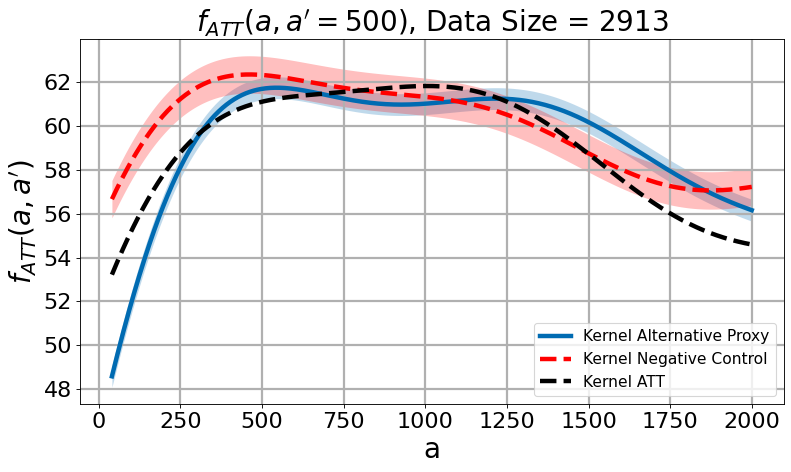

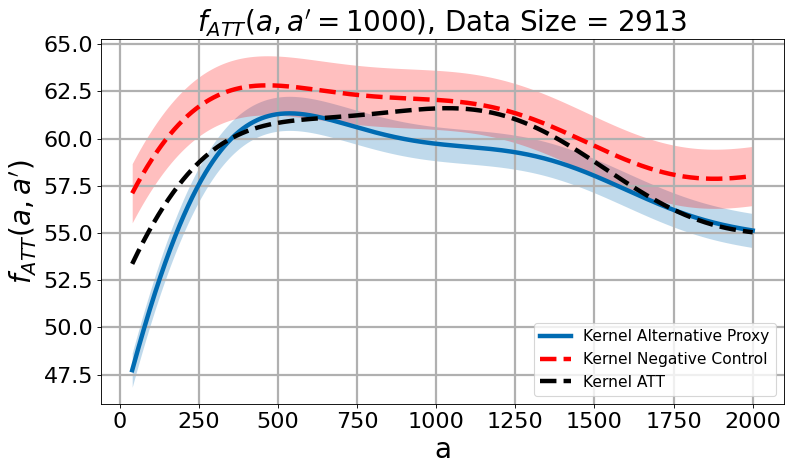

In [15]:
counter = 0
do_A_range = (40, 2000)
do_A = np.linspace(40, 2000, 1000)[:, np.newaxis].reshape(-1)
do_A_size = do_A.shape[0]
sigma_square_ = 0.

for a_prime in df_results_aggregated['a_prime'].unique():
    for data_size in df_results_aggregated['Data_Size'].unique():
        counter += 1
        
        df_results_data_size = df_results_aggregated.loc[df_results_aggregated['Data_Size'] == data_size]
        
        kernel_alternative_proxy_estimate = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_Alternative_Proxy') & (df_results_data_size['a_prime'] == a_prime) & (df_results_data_size['sigma_square'] == sigma_square_)]['ATT_mean'].values[0]
        kernel_alternative_proxy_std = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_Alternative_Proxy') & (df_results_data_size['a_prime'] == a_prime) & (df_results_data_size['sigma_square'] == sigma_square_)]['ATT_std'].values[0]
        
        kernel_negative_control_estimate = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_Negative_Control') & (df_results_data_size['a_prime'] == a_prime)]['ATT_mean'].values[0]
        kernel_negative_control_std = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_Negative_Control') & (df_results_data_size['a_prime'] == a_prime)]['ATT_std'].values[0]
        
        kernel_ATT_estimate = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_ATT') & (df_results_data_size['a_prime'] == a_prime)]['ATT_mean'].values[0]
        kernel_ATT_std = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_ATT') & (df_results_data_size['a_prime'] == a_prime)]['ATT_std'].values[0]
        
        
        SetPlotRC()
        x = do_A
        fh2=plt.figure(figsize=(10, 6), dpi=80)
        plt.plot(x, kernel_alternative_proxy_estimate, linewidth=4, color='#006BB2', label = 'Kernel Alternative Proxy')
        plt.fill_between(x, (kernel_alternative_proxy_estimate + kernel_alternative_proxy_std)[:,0], (kernel_alternative_proxy_estimate - kernel_alternative_proxy_std)[:,0], alpha=0.25, linewidth=0, color='#006BB2')
        plt.plot(x, kernel_negative_control_estimate, linewidth=4, color='r', linestyle = '--', label = 'Kernel Negative Control')
        plt.fill_between(x, (kernel_negative_control_estimate + kernel_negative_control_std)[:,0], (kernel_negative_control_estimate - kernel_negative_control_std)[:,0], alpha=0.25, linewidth=0, color='r')
        plt.plot(x, kernel_ATT_estimate, linewidth=4, color='k', linestyle = '--', label = 'Kernel ATT')
        plt.fill_between(x, (kernel_ATT_estimate + kernel_ATT_std)[:,0], (kernel_ATT_estimate - kernel_ATT_std)[:,0], alpha=0.25, linewidth=0, color='k')
        plt.grid(linewidth=2.0)
        plt.legend(fontsize = 14)
        plt.xlabel("a")
        plt.ylabel(r"$f_{{ATT}}(a, a')$")
        plt.title(r"$f_{{ATT}}(a, a' = $" + "{}".format(a_prime) + "$)$, Data Size = {}".format(data_size))
        ApplyFont(plt.gca(), xlabel_text_size = 25.0, ylabel_text_size = 25.0, title_text_size = 25.0, ticks_text_size = 20,)
        if (counter == 1) | (counter == 2):
            plt.tight_layout()
            plt.savefig('Figures/Alternative_Proxy_ATT_JobCorps_Comparison_Misspecified_Setting2.1_{}.pdf'.format(counter), format='pdf')
        plt.show()

# Job Corps Data Simulation - Misspecified Setting 2.2

In [16]:
df_results = pd.read_pickle(r"../Results/JobCorps_ATT_Estimation_Comparison_Misspecified_Setting2.2.pkl")
df_results.loc[df_results['sigma_square'].isnull(), 'sigma_square'] = -1.
df_results.loc[df_results['alternative_proxy_eta_parameter'].isnull(), 'alternative_proxy_eta_parameter'] = -1.

def popstd(x):
    return np.concatenate(x.values, axis = 1).std(1)
def reshape_1_1(x):
    return np.array(x).reshape(-1, 1)

df_results["ATT_Estimation"] = df_results["ATT_Estimation"].apply(reshape_1_1)
df_results_aggregated = df_results.groupby(['Algorithm', 'Data_Size', 'a_prime', 'sigma_square']).agg({ 'ATT_Estimation':['mean', popstd]}).set_axis(['ATT_mean', 'ATT_std'], axis=1).reset_index()

print(df_results["Algorithm"].unique())
print(df_results.shape)

df_results_aggregated.head()

['Kernel_Alternative_Proxy' 'Kernel_Negative_Control' 'Kernel_ATT']
(40, 8)


Algorithm  Data_Size  a_prime  sigma_square  \
0                Kernel_ATT       2913      500          -1.0   
1                Kernel_ATT       2913     1000          -1.0   
2  Kernel_Alternative_Proxy       2913      500           0.0   
3  Kernel_Alternative_Proxy       2913      500           1.0   
4  Kernel_Alternative_Proxy       2913     1000           0.0   

                                            ATT_mean  \
0  [[53.222065], [53.29293], [53.363445], [53.433...   
1  [[53.362354], [53.431435], [53.50016], [53.568...   
2  [[50.9694033000671], [51.075967189618815], [51...   
3  [[45.95187247531023], [46.07102227748612], [46...   
4  [[50.33990542057929], [50.44947382166883], [50...   

                                             ATT_std  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 3.8146973e-06, 0.0, ...  
1  [0.0, 0.0, 3.8146973e-06, 0.0, 0.0, 0.0, 0.0, ...  
2  [1.732389249000572, 1.7274784122304934, 1.7225...  
3  [1.0029972210779274, 1.0020903092021596, 1.001...  
4  [1.765472230848862, 1.762034341789131, 1.75855...

In [17]:
a_prime = 500
gt_ate = df_results.loc[(df_results['Algorithm'] == "Kernel_ATT") & (df_results['a_prime'] == a_prime), "ATT_Estimation"].values[0]

kap_ate_estimation = np.concatenate(df_results.loc[(df_results['Algorithm'] == "Kernel_Alternative_Proxy") & (df_results['sigma_square'] == 0.) & (df_results['a_prime'] == a_prime), "ATT_Estimation"].values, 1)

knc_ate_estimation = np.concatenate(df_results.loc[(df_results['Algorithm'] == "Kernel_Negative_Control"), "ATT_Estimation"].values, 1)

kap_mses = ((kap_ate_estimation - gt_ate.reshape(-1, 1)) ** 2).mean(0)
knc_mses = ((knc_ate_estimation - gt_ate.reshape(-1, 1)) ** 2).mean(0)

df_mse = pd.DataFrame(columns = ["Algorithm", "MSE", "Std"])

df_mse = pd.concat([df_mse, pd.DataFrame([{"Algorithm" : "Kernel Alternative Proxy", "MSE" : kap_mses.mean(), "Std" : kap_mses.std() }])], ignore_index=True )
df_mse = pd.concat([df_mse, pd.DataFrame([{"Algorithm" : "Kernel Negative Control", "MSE" : knc_mses.mean(), "Std" : knc_mses.std() }])], ignore_index=True )
df_mse

Algorithm       MSE       Std
0  Kernel Alternative Proxy  1.941546  1.017921
1   Kernel Negative Control  3.713056  1.953050

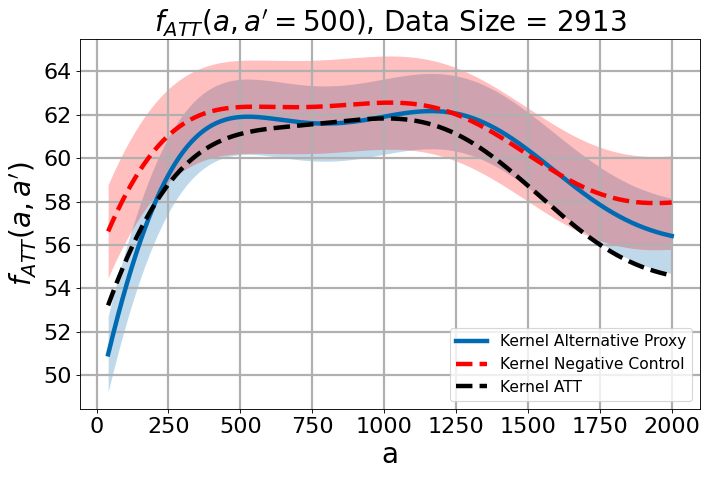

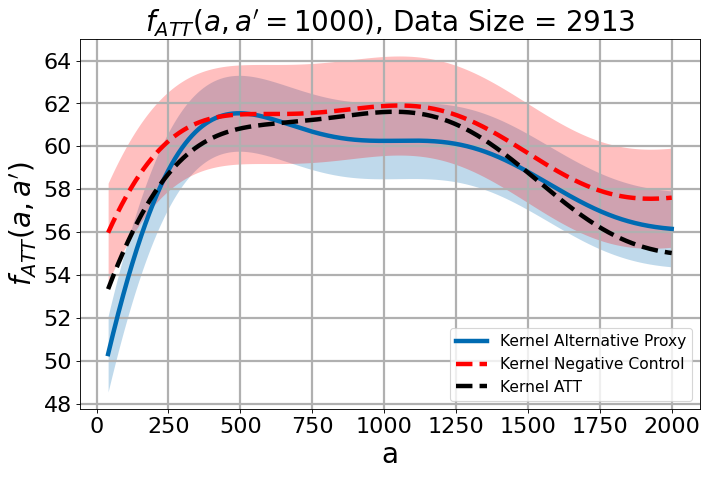

In [17]:
counter = 0
do_A_range = (40, 2000)
do_A = np.linspace(40, 2000, 1000)[:, np.newaxis].reshape(-1)
do_A_size = do_A.shape[0]
sigma_square_ = 0.

for a_prime in df_results_aggregated['a_prime'].unique():
    for data_size in df_results_aggregated['Data_Size'].unique():
        counter += 1
        
        df_results_data_size = df_results_aggregated.loc[df_results_aggregated['Data_Size'] == data_size]
        
        kernel_alternative_proxy_estimate = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_Alternative_Proxy') & (df_results_data_size['a_prime'] == a_prime) & (df_results_data_size['sigma_square'] == sigma_square_)]['ATT_mean'].values[0]
        kernel_alternative_proxy_std = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_Alternative_Proxy') & (df_results_data_size['a_prime'] == a_prime) & (df_results_data_size['sigma_square'] == sigma_square_)]['ATT_std'].values[0]
        
        kernel_negative_control_estimate = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_Negative_Control') & (df_results_data_size['a_prime'] == a_prime)]['ATT_mean'].values[0]
        kernel_negative_control_std = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_Negative_Control') & (df_results_data_size['a_prime'] == a_prime)]['ATT_std'].values[0]
        
        kernel_ATT_estimate = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_ATT') & (df_results_data_size['a_prime'] == a_prime)]['ATT_mean'].values[0]
        kernel_ATT_std = df_results_data_size.loc[(df_results_data_size['Algorithm'] == 'Kernel_ATT') & (df_results_data_size['a_prime'] == a_prime)]['ATT_std'].values[0]
        
        
        SetPlotRC()
        x = do_A
        fh2=plt.figure(figsize=(10, 6), dpi=80)
        plt.plot(x, kernel_alternative_proxy_estimate, linewidth=4, color='#006BB2', label = 'Kernel Alternative Proxy')
        plt.fill_between(x, (kernel_alternative_proxy_estimate + kernel_alternative_proxy_std)[:,0], (kernel_alternative_proxy_estimate - kernel_alternative_proxy_std)[:,0], alpha=0.25, linewidth=0, color='#006BB2')
        plt.plot(x, kernel_negative_control_estimate, linewidth=4, color='r', linestyle = '--', label = 'Kernel Negative Control')
        plt.fill_between(x, (kernel_negative_control_estimate + kernel_negative_control_std)[:,0], (kernel_negative_control_estimate - kernel_negative_control_std)[:,0], alpha=0.25, linewidth=0, color='r')
        plt.plot(x, kernel_ATT_estimate, linewidth=4, color='k', linestyle = '--', label = 'Kernel ATT')
        plt.fill_between(x, (kernel_ATT_estimate + kernel_ATT_std)[:,0], (kernel_ATT_estimate - kernel_ATT_std)[:,0], alpha=0.25, linewidth=0, color='k')
        plt.grid(linewidth=2.0)
        plt.legend(fontsize = 14)
        plt.xlabel("a")
        plt.ylabel(r"$f_{{ATT}}(a, a')$")
        plt.title(r"$f_{{ATT}}(a, a' = $" + "{}".format(a_prime) + "$)$, Data Size = {}".format(data_size))
        ApplyFont(plt.gca(), xlabel_text_size = 25.0, ylabel_text_size = 25.0, title_text_size = 25.0, ticks_text_size = 20,)
        if (counter == 1) | (counter == 2):
            plt.tight_layout()
            plt.savefig('Figures/Alternative_Proxy_ATT_JobCorps_Comparison_Misspecified_Setting2.2_{}.pdf'.format(counter), format='pdf')
        plt.show()